# Chatbot  
---
- [reference] https://python.langchain.com/v0.2/docs/tutorials/chatbot/  

## Quickstart

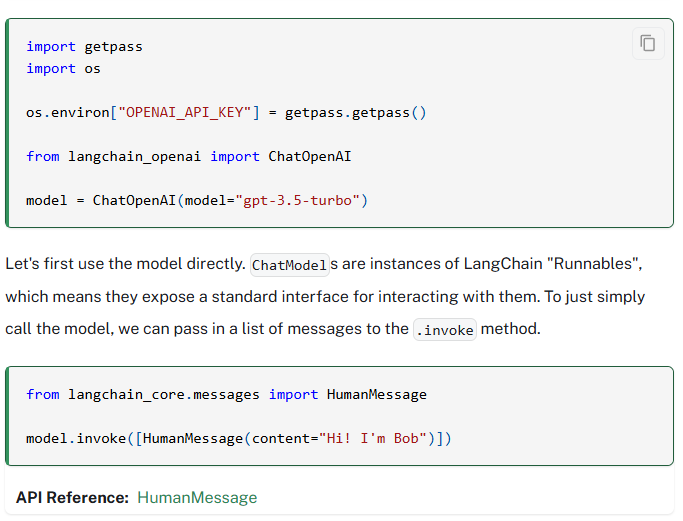

In [112]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage
from dotenv import load_dotenv

load_dotenv()

llm = ChatOpenAI(
    model_name = 'gpt-3.5-turbo',
)


In [26]:
aimessage = llm.invoke([HumanMessage(content="Hi! I'm J.")])
aimessage.content

'Hello, J! Nice to meet you. How can I assist you today?'

In [27]:
aimessage02 = llm.invoke("What's my name?")
aimessage02.content

"I'm sorry, but I don't know your name."

In [4]:
aimessage03 = llm.invoke([HumanMessage(content="What's my name?")])
aimessage03.content

"I'm sorry, but I don't have that information. How can I assist you today?"

In [28]:
aimessage04 = llm.invoke([
    HumanMessage(content="Hi! I'm J."),
    AIMessage(content="Hello J! How can I assist you today!"),
    HumanMessage(content="What's my name?"),
])

aimessage04.content

'Your name is J! How can I help you today?'

## Message History
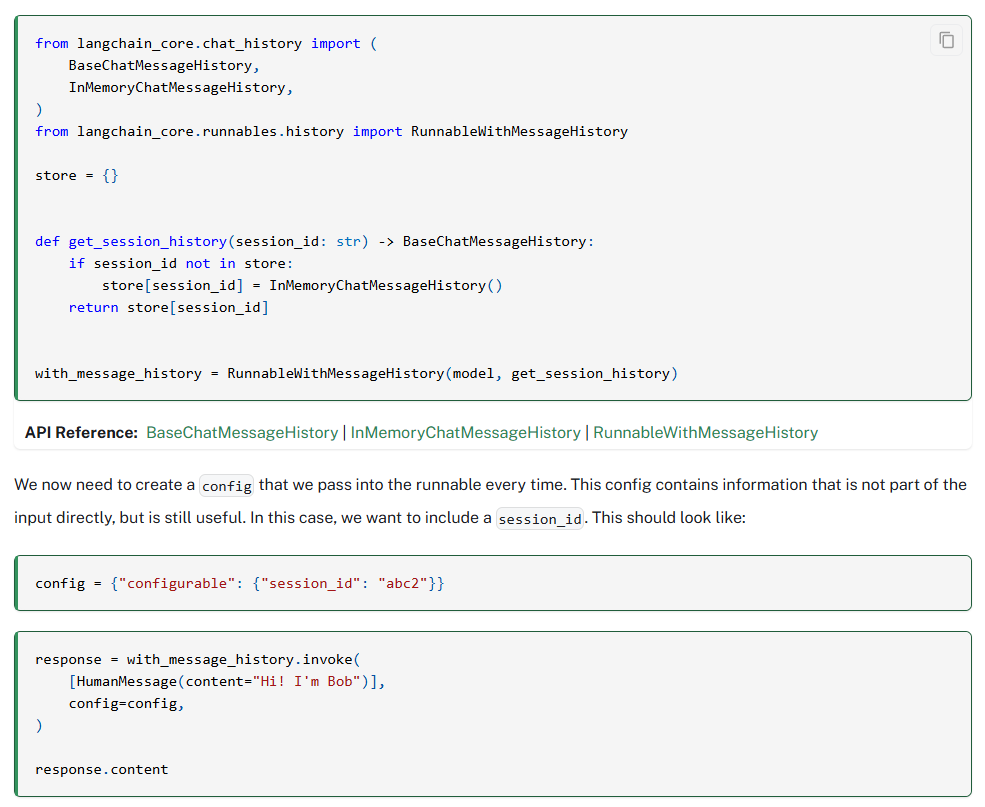

In [59]:
from langchain_core.chat_history import InMemoryChatMessageHistory, BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id : str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]

with_message_history = RunnableWithMessageHistory(llm, get_session_history)


In [60]:
response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm J.")],
    config={"configurable": {"session_id": "a1"}}
)

response.content

'Hello, J! Nice to meet you. How can I assist you today?'

In [61]:
response02 = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config={"configurable": {"session_id": "a1"}}
)

response02.content

'Your name is J! How can I help you today?'

In [62]:
response03 = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config={"configurable": {"session_id": "b2"}}
)

response03.content

"I'm sorry, but I don't know your name. How can I assist you today?"

### [문제] 대화 이력에서 첫번째 질문을 출력  


In [67]:
get_session_history('a1')

InMemoryChatMessageHistory(messages=[HumanMessage(content="Hi! I'm J.", additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, J! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 12, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_eede8f0d45', 'id': 'chatcmpl-Bc1DeToORzMDh9adwpl5v6WTkBDFq', 'finish_reason': 'stop', 'logprobs': None}, id='run--ce81ea69-446f-4fd5-8eba-537cd27c7702-0', usage_metadata={'input_tokens': 12, 'output_tokens': 16, 'total_tokens': 28, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content="What's my name?", additional_kw

In [66]:
get_session_history('a1').messages[0].content

"Hi! I'm J."

In [68]:
store.keys()

dict_keys(['a1', 'b2'])

In [73]:
for message_b2 in get_session_history('b2').messages :
    print(message_b2.content)

What's my name?
I'm sorry, but I don't know your name. How can I assist you today?


## Prompt templates  

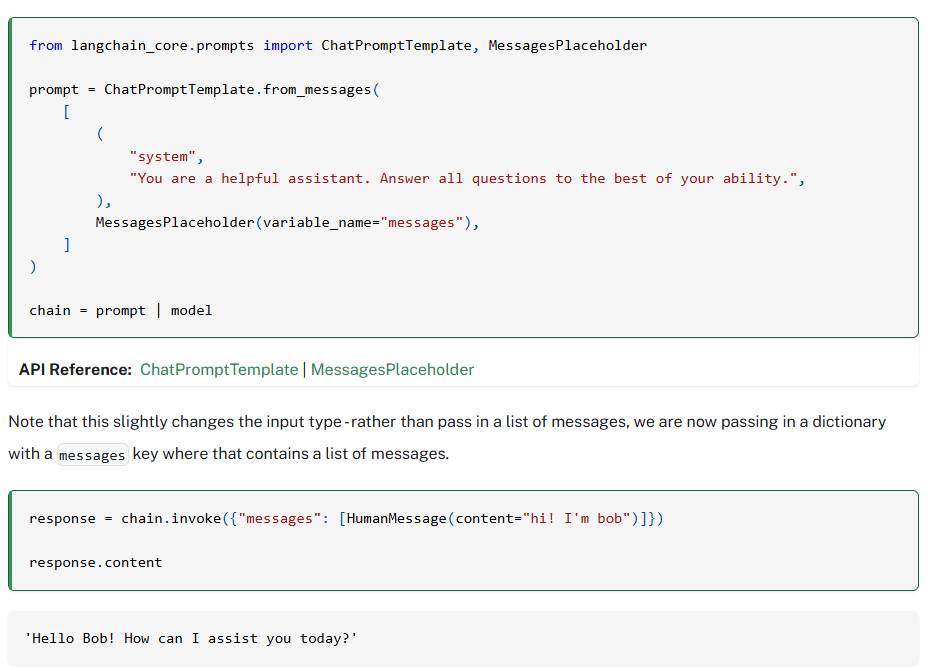

In [77]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages([
    ('system', "You are a helpful assistant. Answer all questions to the best of your ability."),
    MessagesPlaceholder(variable_name="messages")
])

chain = prompt | llm

In [78]:
response04 = chain.invoke({'messages': [HumanMessage(content="Hi! I'm bob.")]})

response04.content

'Hello, Bob! Nice to meet you. How can I assist you today?'

In [79]:
with_message_history02 = RunnableWithMessageHistory(chain, get_session_history)

response05 = with_message_history02.invoke(
    [HumanMessage(content="Hi! I'm Jim.")], 
    config={"configurable": {"session_id": "c3"}}
)

response05.content

'Hello Jim! Nice to meet you. How can I assist you today?'

In [82]:
response05_test = with_message_history02.invoke(
    [HumanMessage(content="What's my name?")],
    config={"configurable": {"session_id": "c3"}}
)

response05_test.content

'Your name is Jim!'

In [100]:
get_session_history('c3').messages

[HumanMessage(content="Hi! I'm Jim.", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello Jim! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 32, 'total_tokens': 47, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_eede8f0d45', 'id': 'chatcmpl-Bc2nRWiKLuJqWct0IHlH26IR3tNAX', 'finish_reason': 'stop', 'logprobs': None}, id='run--2233cc9d-aee0-4c35-8f54-cfcf175063e1-0', usage_metadata={'input_tokens': 32, 'output_tokens': 15, 'total_tokens': 47, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content="What's my name?", additional_kwargs={}, response_metadata={}),

In [98]:
for message_c3 in get_session_history('c3').messages:
    print(f"[{message_c3.type.upper()}]: {message_c3.content}")


[HUMAN]: Hi! I'm Jim.
[AI]: Hello Jim! Nice to meet you. How can I assist you today?
[HUMAN]: What's my name?
[AI]: Your name is Jim!


In [105]:
def change_config(session_id) :
    return {"configurable": {"session_id": session_id}}

In [92]:
prompt_language = ChatPromptTemplate.from_messages([
    ('system', "You are a helpful assistant. Answer all questions to the best of your ability in {language}."),
    MessagesPlaceholder(variable_name="messages")
])

chain_language = prompt_language | llm

In [101]:
response_language = chain_language.invoke({
    "messages":[HumanMessage(content="Hi! I'm bob2.")], 
    "language": "Korean"
})

response_language.content

'안녕하세요, bob2님! 어떻게 도와드릴까요?'

Let's now wrap this more complicated chain in a Message History class. This time, because there are multiple keys in the input, we need to specify the correct key to use to save the chat history.

In [ ]:
with_message_history02 = RunnableWithMessageHistory(
    chain_language,
    get_session_history,
    # history_messages_key="messages",
    input_messages_key="messages",
)


response_language02 = with_message_history02.invoke(
    {"messages": [HumanMessage(content="Hi! I'm Todd.")], "language": "Korean"},
    config=change_config("d4")
)

response_language02.content

'안녕하세요, Todd! 만나서 반가워요. 오늘 어떤 도움을 드릴까요?'

In [107]:
response_language03 = with_message_history02.invoke(
     {"messages": [HumanMessage(content="What is my name?")], "language": "Korean"},
     config=change_config("d4")
)

response_language03.content

'당신의 이름은 Todd입니다.'

## Managing Conversation History  

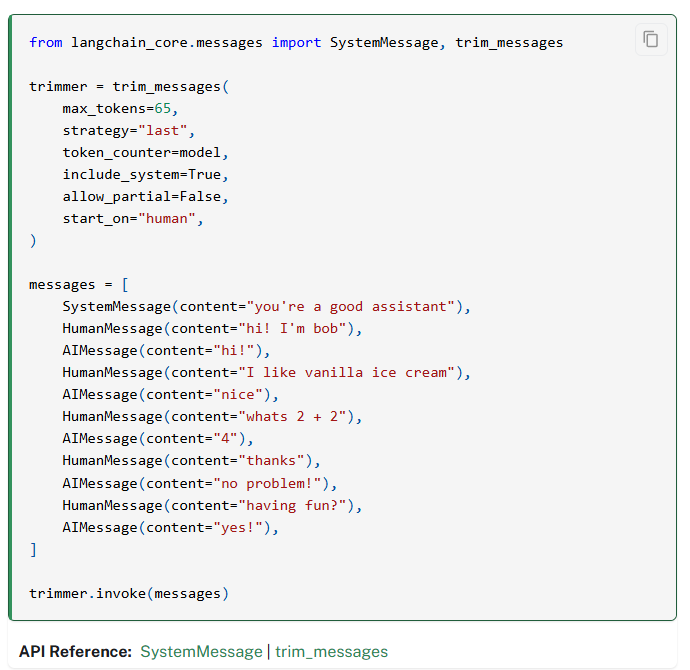

In [113]:
from langchain_core.messages import SystemMessage, trim_messages

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=llm,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant."),
    HumanMessage(content="hi! I'm bob."),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream."),
    AIMessage(content="nice."),
    HumanMessage(content="what's 2 + 2?"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

[SystemMessage(content="you're a good assistant.", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="what's 2 + 2?", additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]